In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving clean_kaggle_data_2021.csv to clean_kaggle_data_2021.csv


In [ ]:
df_kaggle = pd.read_csv(r'clean_kaggle_data_2021.csv')

In [ ]:
df_kaggle

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q25_Encoded,Q25_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,6.0,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
15388,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,"80,000-89,999"
15389,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"10,000-19,999"
15390,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,"0-9,999"


## Data cleaning

In [ ]:
# Saving the questions and dropping the row
questions = df_kaggle.iloc[0, :].T
df_kaggle = df_kaggle.iloc[1:, :]
df_kaggle

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q25_Encoded,Q25_buckets
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,6.0,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,3.0,"30,000-39,999"
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
15388,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,"80,000-89,999"
15389,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"10,000-19,999"
15390,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,"0-9,999"


In [ ]:
#first I am looking at the datatypes 
df_kaggle.dtypes.value_counts()

object     370
float64      1
dtype: int64

In [ ]:
#look at the column names 
feature_names = df_kaggle.columns
for i in feature_names:
    print(i)

Time from Start to Finish (seconds)
Q1
Q2
Q3
Q4
Q5
Q6
Q7_Part_1
Q7_Part_2
Q7_Part_3
Q7_Part_4
Q7_Part_5
Q7_Part_6
Q7_Part_7
Q7_Part_8
Q7_Part_9
Q7_Part_10
Q7_Part_11
Q7_Part_12
Q7_OTHER
Q8
Q9_Part_1
Q9_Part_2
Q9_Part_3
Q9_Part_4
Q9_Part_5
Q9_Part_6
Q9_Part_7
Q9_Part_8
Q9_Part_9
Q9_Part_10
Q9_Part_11
Q9_Part_12
Q9_OTHER
Q10_Part_1
Q10_Part_2
Q10_Part_3
Q10_Part_4
Q10_Part_5
Q10_Part_6
Q10_Part_7
Q10_Part_8
Q10_Part_9
Q10_Part_10
Q10_Part_11
Q10_Part_12
Q10_Part_13
Q10_Part_14
Q10_Part_15
Q10_Part_16
Q10_OTHER
Q11
Q12_Part_1
Q12_Part_2
Q12_Part_3
Q12_Part_4
Q12_Part_5
Q12_OTHER
Q13
Q14_Part_1
Q14_Part_2
Q14_Part_3
Q14_Part_4
Q14_Part_5
Q14_Part_6
Q14_Part_7
Q14_Part_8
Q14_Part_9
Q14_Part_10
Q14_Part_11
Q14_OTHER
Q15
Q16_Part_1
Q16_Part_2
Q16_Part_3
Q16_Part_4
Q16_Part_5
Q16_Part_6
Q16_Part_7
Q16_Part_8
Q16_Part_9
Q16_Part_10
Q16_Part_11
Q16_Part_12
Q16_Part_13
Q16_Part_14
Q16_Part_15
Q16_Part_16
Q16_Part_17
Q16_OTHER
Q17_Part_1
Q17_Part_2
Q17_Part_3
Q17_Part_4
Q17_Part_5
Q17_Part_6
Q17_P

In [ ]:
#seeing which feature is float 
for i in feature_names:
    if(df_kaggle[i].dtype == 'float64'):
        print(i)

Q25_Encoded


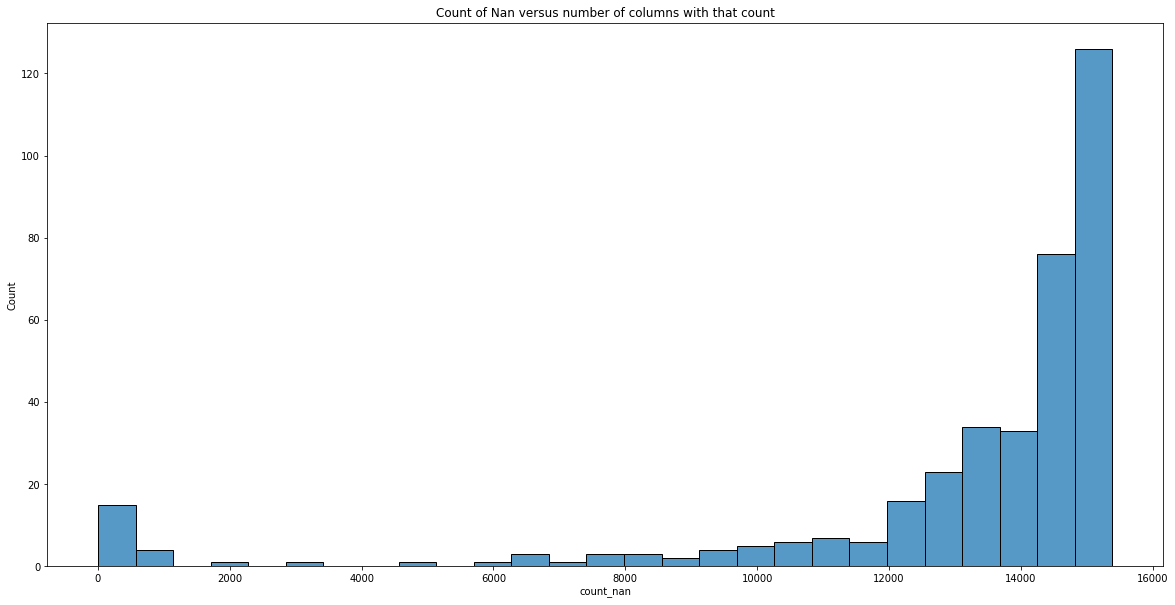

In [ ]:
#Now, I will show the distribution of nan values as a histogram.
list_nan_count = []
for i in range(len(feature_names)):
    list_nan_count.append([i, feature_names[i], df_kaggle[feature_names[i]].isna().sum()])

df_nan_count = pd.DataFrame(list_nan_count, columns = ['feature_index','feature_names', 'count_nan'])

#plotting nan values 
plt.figure(figsize=(20, 10))
#fig, ax = plt.subplots()
sns.histplot(df_nan_count, x = 'count_nan')
#plt.xlim(0,16000)
#plt.xticks(range(0,300,1000))
plt.title("Count of Nan versus number of columns with that count")
plt.show()

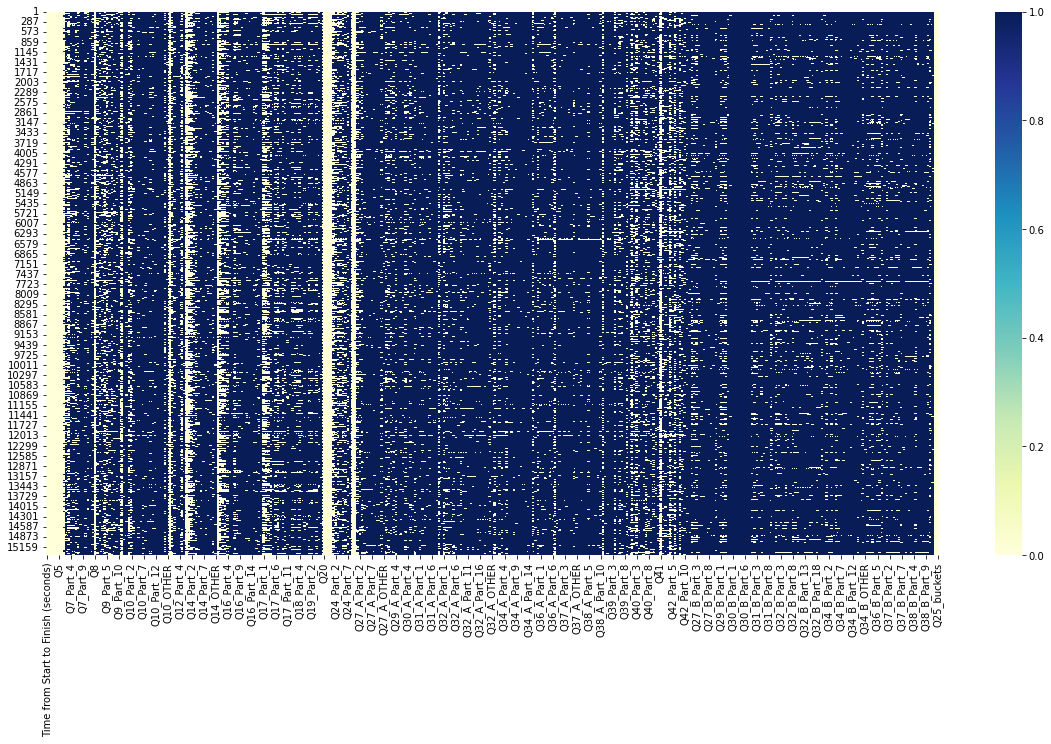

In [ ]:
#heat map for nan distribution
plt.figure(figsize=(20, 10))
sns.heatmap(df_kaggle.isnull(), cbar=True, cmap="YlGnBu")
plt.show()

In [ ]:
#Now, I am looking at the nan values 
for i in feature_names:
    print(i, df_kaggle[i].isna().sum())

Time from Start to Finish (seconds) 0
Q1 0
Q2 0
Q3 0
Q4 0
Q5 0
Q6 0
Q7_Part_1 2924
Q7_Part_2 11985
Q7_Part_3 8293
Q7_Part_4 13355
Q7_Part_5 12901
Q7_Part_6 12911
Q7_Part_7 12817
Q7_Part_8 15194
Q7_Part_9 15218
Q7_Part_10 13714
Q7_Part_11 13834
Q7_Part_12 15212
Q7_OTHER 13501
Q8 961
Q9_Part_1 11863
Q9_Part_2 12345
Q9_Part_3 13047
Q9_Part_4 9784
Q9_Part_5 11204
Q9_Part_6 13146
Q9_Part_7 12741
Q9_Part_8 13822
Q9_Part_9 14193
Q9_Part_10 14286
Q9_Part_11 5927
Q9_Part_12 15101
Q9_OTHER 14507
Q10_Part_1 9940
Q10_Part_2 9719
Q10_Part_3 14648
Q10_Part_4 15258
Q10_Part_5 14377
Q10_Part_6 15281
Q10_Part_7 14757
Q10_Part_8 14801
Q10_Part_9 15135
Q10_Part_10 14125
Q10_Part_11 14301
Q10_Part_12 14898
Q10_Part_13 15190
Q10_Part_14 15220
Q10_Part_15 15292
Q10_Part_16 11261
Q10_OTHER 14957
Q11 961
Q12_Part_1 10445
Q12_Part_2 13300
Q12_Part_3 15118
Q12_Part_4 15111
Q12_Part_5 7823
Q12_OTHER 14908
Q13 961
Q14_Part_1 4750
Q14_Part_2 7469
Q14_Part_3 11351
Q14_Part_4 11891
Q14_Part_5 14339
Q14_Part_6 14626


In [ ]:
#I am dropping columns that have nan values of above 15000
for i in feature_names:
    if df_kaggle[i].isna().sum() >= 15000:
        df_kaggle = df_kaggle.drop(columns=[i])

The rest of the data has only string values and are most likely categorical, but let me check by looking at the unique values
and see how we can impute them

In [ ]:
feature_names = df_kaggle.columns

for i in feature_names:
    print(i, df_kaggle[i].unique(), df_kaggle[i].nunique())

Time from Start to Finish (seconds) ['910' '784' '924' ... 69978 96354 1756] 4314
Q1 ['50-54' '22-24' '45-49' '30-34' '40-44' '35-39' '18-21' '70+' '25-29'
 '55-59' '60-69'] 11
Q2 ['Man' 'Woman' 'Prefer not to say' 'Nonbinary' 'Prefer to self-describe'] 5
Q3 ['India' 'Indonesia' 'Pakistan' 'Mexico' 'Turkey' 'Australia' 'Nigeria'
 'Greece' 'Belgium' 'Egypt' 'Singapore' 'Brazil' 'Poland'
 'Iran, Islamic Republic of...' 'Japan' 'Italy' 'United States of America'
 'Viet Nam' 'Israel' 'China' 'South Africa' 'Other' 'Bangladesh' 'Russia'
 'United Kingdom of Great Britain and Northern Ireland' 'France' 'Tunisia'
 'Argentina' 'I do not wish to disclose my location' 'Colombia' 'Sweden'
 'Chile' 'Saudi Arabia' 'Spain' 'Morocco' 'Austria' 'Kenya' 'Canada'
 'Ireland' 'Portugal' 'Hong Kong (S.A.R.)' 'Ukraine' 'Denmark' 'Germany'
 'South Korea' 'Sri Lanka' 'Netherlands' 'Ghana' 'Malaysia' 'Thailand'
 'Nepal' 'Taiwan' 'Switzerland' 'Peru' 'United Arab Emirates'
 'Philippines' 'Algeria' 'Ethiopia' 'Ro

for all the rows that have only 1 unique value, I am assuming that the users who did not choose the only given option have null in that place.So, I will replace those null values with 'other'


In [ ]:
for i in feature_names:
    if df_kaggle[i].nunique() == 1:
        df_kaggle.loc[df_kaggle[i].isnull(), i] = 'Other'

In [ ]:
#now, I will print the nan values and see 
for i in feature_names:
    print(i, df_kaggle[i].isna().sum())

Time from Start to Finish (seconds) 0
Q1 0
Q2 0
Q3 0
Q4 0
Q5 0
Q6 0
Q7_Part_1 0
Q7_Part_2 0
Q7_Part_3 0
Q7_Part_4 0
Q7_Part_5 0
Q7_Part_6 0
Q7_Part_7 0
Q7_Part_10 0
Q7_Part_11 0
Q7_OTHER 0
Q8 961
Q9_Part_1 0
Q9_Part_2 0
Q9_Part_3 0
Q9_Part_4 0
Q9_Part_5 0
Q9_Part_6 0
Q9_Part_7 0
Q9_Part_8 0
Q9_Part_9 0
Q9_Part_10 0
Q9_Part_11 0
Q9_OTHER 0
Q10_Part_1 0
Q10_Part_2 0
Q10_Part_3 0
Q10_Part_5 0
Q10_Part_7 0
Q10_Part_8 0
Q10_Part_10 0
Q10_Part_11 0
Q10_Part_12 0
Q10_Part_16 0
Q10_OTHER 0
Q11 961
Q12_Part_1 0
Q12_Part_2 0
Q12_Part_5 0
Q12_OTHER 0
Q13 961
Q14_Part_1 0
Q14_Part_2 0
Q14_Part_3 0
Q14_Part_4 0
Q14_Part_5 0
Q14_Part_6 0
Q14_Part_8 0
Q14_Part_9 0
Q14_Part_10 0
Q14_Part_11 0
Q14_OTHER 0
Q15 961
Q16_Part_1 0
Q16_Part_2 0
Q16_Part_3 0
Q16_Part_4 0
Q16_Part_5 0
Q16_Part_7 0
Q16_Part_8 0
Q16_Part_9 0
Q16_Part_10 0
Q16_Part_11 0
Q16_Part_12 0
Q16_Part_13 0
Q16_Part_15 0
Q16_Part_16 0
Q16_Part_17 0
Q17_Part_1 0
Q17_Part_2 0
Q17_Part_3 0
Q17_Part_4 0
Q17_Part_5 0
Q17_Part_6 0
Q17_Part_7 0
Q

it is seen that all the features that had only one input and 'null' otherwise have been altered to other now, I am filling the rest of the categorical variables' nan values using mode techique. 

In [ ]:
for i in feature_names:
    if df_kaggle[i].nunique() > 1 and df_kaggle[i].dtype== 'object':
        df_kaggle[i].fillna(df_kaggle[i].mode()[0],inplace=True)

In [ ]:
#now, I am finally checking if there are any nan values present
c = 0
nan_columns = []
for i in feature_names:
    if df_kaggle[i].isna().sum() >0:
        nan_columns.append(i)
        c+=1
if c!=1:
    print("All nan values are removed")

All nan values are removed


In [ ]:
feature_names = df_kaggle.columns

In [ ]:
df_kaggle.dtypes

Time from Start to Finish (seconds)     object
Q1                                      object
Q2                                      object
Q3                                      object
Q4                                      object
                                        ...   
Q38_B_Part_8                            object
Q38_B_Part_10                           object
Q38_B_Part_11                           object
Q25_Encoded                            float64
Q25_buckets                             object
Length: 269, dtype: object

In [ ]:
#dropping this column cause it is not relevant to the salary range
df_kaggle = df_kaggle.drop(columns= ['Time from Start to Finish (seconds)'])

In [ ]:
feature_names = df_kaggle.columns

Since there are no nan values, I am label encoding all the categorical variables 

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in feature_names:
    if df_kaggle[i].dtype == 'object':
        df_kaggle[i] = le.fit_transform(df_kaggle[i])

In [ ]:
df_kaggle

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q37_B_Part_6,Q37_B_Part_7,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_5,Q38_B_Part_8,Q38_B_Part_10,Q38_B_Part_11,Q25_Encoded,Q25_buckets
1,7,0,23,0,7,4,1,1,0,1,...,1,1,1,1,1,1,1,1,2.0,5
2,7,0,24,3,9,2,0,0,1,0,...,1,1,1,1,1,1,1,0,6.0,10
3,1,0,41,3,11,0,1,0,0,1,...,1,1,1,1,0,1,1,1,0.0,0
4,6,0,34,1,10,2,1,0,0,1,...,1,1,1,1,1,1,1,0,3.0,7
5,6,0,23,1,7,5,1,0,0,0,...,1,1,1,1,1,1,1,1,3.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,3,0,23,0,2,0,1,0,0,0,...,1,1,1,1,1,1,1,1,0.0,0
15388,4,0,51,0,11,4,1,0,1,1,...,1,1,1,1,1,1,1,1,8.0,12
15389,3,0,15,0,2,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1.0,1
15390,7,0,54,1,10,6,0,0,0,1,...,1,1,1,1,1,1,1,0,0.0,0


## Data exploration and feature engineering

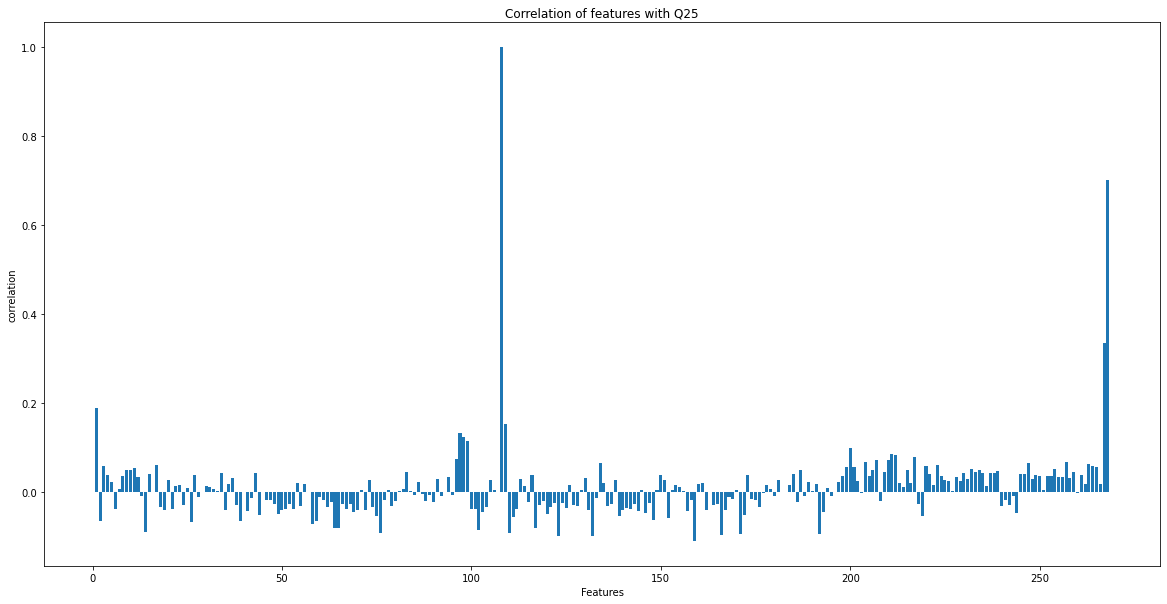

In [ ]:
#I am plotting the correlation with the yearly compensation variable 
x_ = df_kaggle.corrwith(df_kaggle["Q25"])
plt.figure(figsize = (20,10))
plt.bar(np.arange(1,len(x_) + 1), x_)
plt.xlabel("Features")
plt.ylabel("correlation")
plt.title("Correlation of features with Q25")
plt.show()

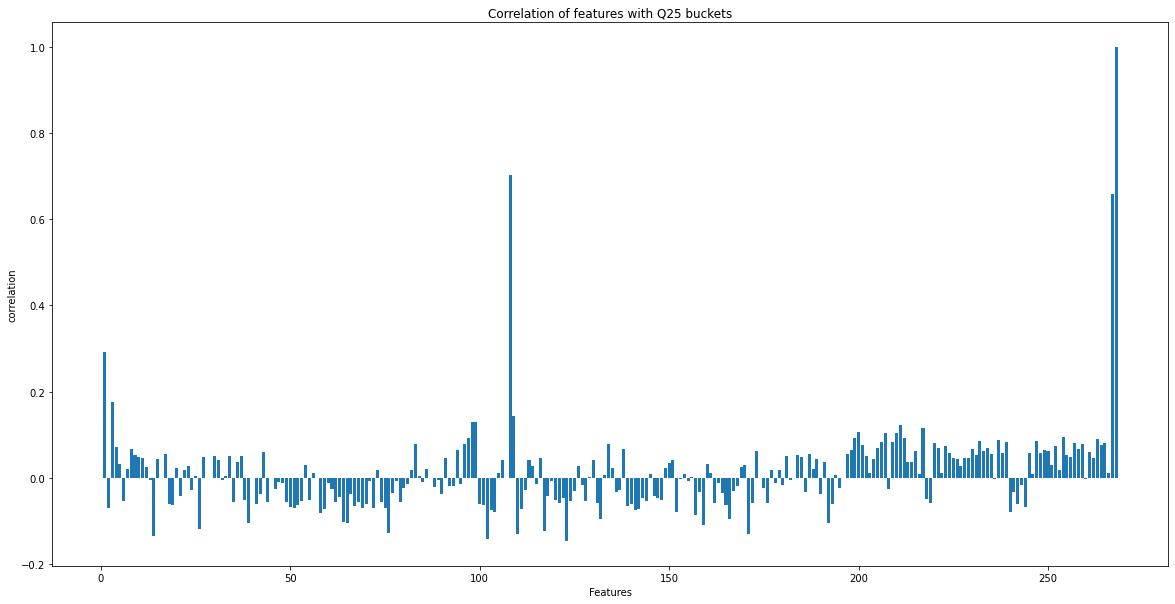

In [ ]:
x_target = df_kaggle.corrwith(df_kaggle["Q25_buckets"])
plt.figure(figsize = (20,10))
plt.bar(np.arange(1,len(x_target) + 1), x_target)
plt.xlabel("Features")
plt.ylabel("correlation")
plt.title("Correlation of features with Q25 buckets")
plt.show()

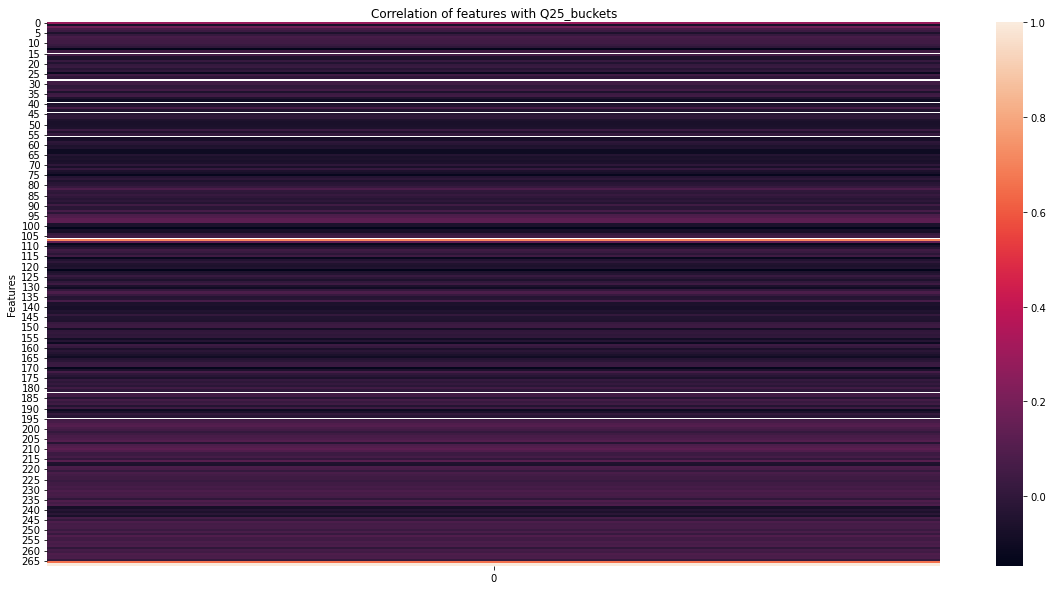

In [ ]:
#I am plotting heatmap correlation with the target variable 
plt.figure(figsize = (20,10))
sns.heatmap(np.array(df_kaggle.corrwith(df_kaggle["Q25_buckets"])).reshape(-1,1))
plt.ylabel("Features")
plt.title("Correlation of features with Q25_buckets")
plt.show()

In [ ]:
#I am seeing which are the most correlated values with q25
x_ = x_.sort_values(ascending=False)
print(x_.to_string())

Q25              1.000000
Q25_buckets      0.702174
Q25_Encoded      0.336060
Q1               0.189498
Q26              0.154257
Q21              0.132573
Q22              0.124893
Q23              0.114746
Q27_B_Part_4     0.098700
Q31_B_Part_3     0.086537
Q31_B_Part_4     0.083342
Q32_B_Part_1     0.080046
Q20              0.074103
Q31_B_Part_2     0.071705
Q29_B_Part_3     0.071535
Q37_B_Part_4     0.067729
Q27_B_Part_11    0.066961
Q36_B_Part_1     0.065672
Q32_A_Part_2     0.065384
Q38_B_Part_5     0.063246
Q8               0.061072
Q32_B_Part_7     0.060392
Q32_B_Part_4     0.059005
Q38_B_Part_8     0.058791
Q3               0.058401
Q38_B_Part_10    0.057509
Q27_B_Part_3     0.057045
Q27_B_Part_5     0.056898
Q7_Part_5        0.055067
Q37_B_Part_1     0.052818
Q32_B_Part_16    0.051894
Q7_Part_4        0.050971
Q29_B_Part_2     0.050928
Q32_B_Part_18    0.050694
Q7_Part_3        0.050544
Q31_B_Part_8     0.049714
Q42_Part_3       0.049350
Q34_B_Part_3     0.048391
Q32_B_Part_1

In [ ]:
#I am seeing which are the most correlated values with q25_buckets
x_target = x_target.sort_values(ascending=False)
print(x_target.to_string())

Q25_buckets      1.000000
Q25              0.702174
Q25_Encoded      0.659038
Q1               0.290678
Q3               0.174723
Q26              0.144234
Q22              0.128612
Q23              0.128257
Q31_B_Part_3     0.122014
Q32_B_Part_1     0.115819
Q27_B_Part_4     0.106535
Q29_B_Part_3     0.104167
Q31_B_Part_2     0.103035
Q37_B_Part_1     0.094599
Q31_B_Part_4     0.092699
Q27_B_Part_3     0.091368
Q21              0.091031
Q38_B_Part_5     0.088775
Q34_B_Part_1     0.086666
Q36_B_Part_1     0.085237
Q32_B_Part_16    0.085131
Q34_B_Part_3     0.083651
Q29_B_Part_2     0.083132
Q31_B_Part_1     0.081876
Q37_B_Part_4     0.081108
Q32_B_Part_4     0.080563
Q38_B_Part_10    0.080369
Q17_Part_10      0.078545
Q32_A_Part_2     0.078022
Q20              0.077725
Q37_B_Part_6     0.077330
Q27_B_Part_5     0.076247
Q38_B_Part_8     0.075861
Q36_B_Part_6     0.073878
Q32_B_Part_7     0.072837
Q4               0.070209
Q32_B_Part_18    0.069782
Q32_B_Part_5     0.069411
Q29_B_Part_1

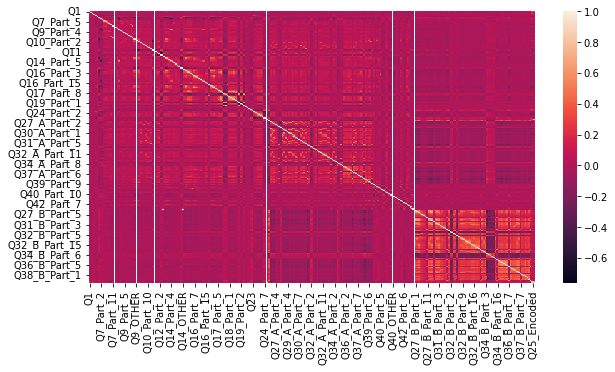

In [ ]:
#correlation between variables 
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
corr_df = df_kaggle.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr_df)
plt.show()


Now, I am doing feature selection using Recursive Feature Elimination

In [ ]:
#split the dataset into features and target
X_df = df_kaggle.iloc[:, :-1]
y_df = df_kaggle.iloc[:, -1:]

In [ ]:
X_df = X_df.reset_index()
y_df = y_df.reset_index()

In [ ]:
#rfe using decision tree classifier for feature selection 
#report which features were selected by RFE
#taking only the first 5000 samples due to time
'''
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=100)
# fit RFE
rfe.fit(X_df[:5000], y_df[:5000])
# summarize all features
feature_imp = []
for i in range(X_df.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
    feature_imp.append([i, rfe.support_[i], rfe.ranking_[i]])
'''

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 3.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 30.000
Column: 15, Selected False, Rank: 4.000
Column: 16, Selected False, Rank: 167.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 24.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selected False

In [ ]:
#For this to be generated, the previous line of code needs to be run
#I am displaying all the features that were selected
feature_imp = sorted(feature_imp,key=lambda l:l[1], reverse = True)
feature_imp

[[0, True, 1],
 [1, True, 1],
 [2, True, 1],
 [3, True, 1],
 [4, True, 1],
 [5, True, 1],
 [6, True, 1],
 [7, True, 1],
 [8, True, 1],
 [9, True, 1],
 [11, True, 1],
 [12, True, 1],
 [13, True, 1],
 [17, True, 1],
 [18, True, 1],
 [19, True, 1],
 [21, True, 1],
 [22, True, 1],
 [23, True, 1],
 [24, True, 1],
 [28, True, 1],
 [30, True, 1],
 [31, True, 1],
 [39, True, 1],
 [41, True, 1],
 [42, True, 1],
 [44, True, 1],
 [46, True, 1],
 [47, True, 1],
 [48, True, 1],
 [49, True, 1],
 [50, True, 1],
 [58, True, 1],
 [59, True, 1],
 [60, True, 1],
 [61, True, 1],
 [64, True, 1],
 [74, True, 1],
 [75, True, 1],
 [76, True, 1],
 [79, True, 1],
 [80, True, 1],
 [82, True, 1],
 [85, True, 1],
 [87, True, 1],
 [88, True, 1],
 [96, True, 1],
 [97, True, 1],
 [98, True, 1],
 [99, True, 1],
 [100, True, 1],
 [101, True, 1],
 [102, True, 1],
 [103, True, 1],
 [104, True, 1],
 [105, True, 1],
 [106, True, 1],
 [108, True, 1],
 [109, True, 1],
 [110, True, 1],
 [111, True, 1],
 [112, True, 1],
 [115,

In [ ]:
#removing the features that are not selected
feature_names = X_df.columns
for i in range(len(feature_imp)):
    if feature_imp[i][1] == False:
        df_kaggle = df_kaggle.drop(columns= [feature_names[feature_imp[i][0]]])

In [ ]:
#I am removing these two features because they are directly associated with the target variable
df_kaggle = df_kaggle.drop(columns= [ 'Q25','Q25_Encoded'])


I am now doing one-hot encoding after splitting the dataset into training and test

In [ ]:
#split the dataset into features and target
X_df = df_kaggle.iloc[:, :-1]
y_df = df_kaggle.iloc[:, -1:]
feature_names = X_df.columns

#one hot encoding
for i in feature_names:
    if X_df[i].dtype == 'int32' or i == 'Q25_Encoded':
        X_df = pd.get_dummies(data=X_df, columns=[i])

#split the dataset into training and testing
X_train_df, X_test_df, y_train, y_test = train_test_split(X_df, y_df, test_size=0.30)
feature_names_x = X_df.columns

In [ ]:
X_train = X_train_df.copy()
X_test = X_test_df.copy()

In [ ]:
#checking if there are any columns that are not present in the test set that is present in the training set
X_train_features = X_train.columns
X_test_features = X_test.columns
for i in X_train_features:
    c = 0
    for j in X_test_features:
        if(i==j):
            c=1
    if c!=1:
        print(i)  

In [ ]:
X_train

,Q26_0,Q26_1,Q26_2,Q26_3,Q26_4,Q26_5,Q27_A_Part_1_0,Q27_A_Part_1_1,Q27_A_Part_2_0,Q27_A_Part_2_1,Q27_A_Part_3_0,Q27_A_Part_3_1,Q27_A_Part_4_0,Q27_A_Part_4_1,Q27_A_Part_5_0,Q27_A_Part_5_1,Q27_A_Part_11_0,Q27_A_Part_11_1,Q28_0,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q28_9,Q28_10,Q28_11,Q28_12,Q29_A_Part_1_0,Q29_A_Part_1_1,Q29_A_Part_2_0,Q29_A_Part_2_1,Q29_A_Part_3_0,Q29_A_Part_3_1,Q29_A_Part_4_0,Q29_A_Part_4_1,Q30_A_Part_1_0,Q30_A_Part_1_1,Q30_A_Part_2_0,Q30_A_Part_2_1,Q30_A_Part_3_0,Q30_A_Part_3_1,Q30_A_Part_4_0,Q30_A_Part_4_1,Q30_A_Part_5_0,Q30_A_Part_5_1,Q30_A_Part_6_0,Q30_A_Part_6_1,Q30_A_Part_7_0,Q30_A_Part_7_1,Q31_A_Part_1_0,Q31_A_Part_1_1,Q31_A_Part_2_0,Q31_A_Part_2_1,Q31_A_Part_3_0,Q31_A_Part_3_1,Q31_A_Part_5_0,Q31_A_Part_5_1,Q31_A_Part_9_0,Q31_A_Part_9_1,Q32_A_Part_1_0,Q32_A_Part_1_1,Q32_A_Part_2_0,Q32_A_Part_2_1,Q32_A_Part_3_0,Q32_A_Part_3_1,Q32_A_Part_4_0,Q32_A_Part_4_1,Q32_A_Part_5_0,Q32_A_Part_5_1,Q32_A_Part_6_0,Q32_A_Part_6_1,Q32_A_Part_8_0,Q32_A_Part_8_1,Q32_A_Part_9_0,Q32_A_Part_9_1,Q32_A_Part_11_0,Q32_A_Part_11_1,Q32_A_Part_13_0,Q32_A_Part_13_1,Q32_A_Part_14_0,Q32_A_Part_14_1,Q32_A_Part_15_0,Q32_A_Part_15_1,Q32_A_Part_16_0,Q32_A_Part_16_1,Q32_A_Part_20_0,Q32_A_Part_20_1,Q33_0,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q33_6,Q33_7,Q33_8,Q33_9,Q33_10,Q33_11,Q33_12,Q33_13,Q33_14,Q33_15,Q33_16,Q33_17,Q33_18,Q33_19,Q34_A_Part_2_0,Q34_A_Part_2_1,Q34_A_Part_3_0,Q34_A_Part_3_1,Q34_A_Part_5_0,Q34_A_Part_5_1,Q34_A_Part_8_0,Q34_A_Part_8_1,Q34_A_Part_16_0,Q34_A_Part_16_1,Q35_0,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q36_A_Part_1_0,Q36_A_Part_1_1,Q36_A_Part_2_0,Q36_A_Part_2_1,Q36_A_Part_3_0,Q36_A_Part_3_1,Q36_A_Part_5_0,Q36_A_Part_5_1,Q32_B_Part_2_0,Q32_B_Part_2_1,Q32_B_Part_3_0,Q32_B_Part_3_1,Q32_B_Part_4_0,Q32_B_Part_4_1,Q32_B_Part_5_0,Q32_B_Part_5_1,Q32_B_Part_6_0,Q32_B_Part_6_1,Q32_B_Part_7_0,Q32_B_Part_7_1,Q32_B_Part_8_0,Q32_B_Part_8_1,Q32_B_Part_9_0,Q32_B_Part_9_1,Q32_B_Part_10_0,Q32_B_Part_10_1,Q32_B_Part_11_0,Q32_B_Part_11_1,Q32_B_Part_12_0,Q32_B_Part_12_1,Q32_B_Part_13_0,Q32_B_Part_13_1,Q32_B_Part_14_0,Q32_B_Part_14_1,Q32_B_Part_15_0,Q32_B_Part_15_1,Q32_B_Part_16_0,Q32_B_Part_16_1,Q32_B_Part_17_0,Q32_B_Part_17_1,Q32_B_Part_18_0,Q32_B_Part_18_1,Q32_B_Part_19_0,Q32_B_Part_19_1,Q32_B_Part_20_0,Q32_B_Part_20_1,Q34_B_Part_1_0,Q34_B_Part_1_1,Q34_B_Part_2_0,Q34_B_Part_2_1,Q34_B_Part_3_0,Q34_B_Part_3_1,Q34_B_Part_5_0,Q34_B_Part_5_1,Q34_B_Part_6_0,Q34_B_Part_6_1,Q34_B_Part_7_0,Q34_B_Part_7_1,Q34_B_Part_8_0,Q34_B_Part_8_1,Q34_B_Part_13_0,Q34_B_Part_13_1,Q34_B_Part_14_0,Q34_B_Part_14_1,Q34_B_Part_16_0,Q34_B_Part_16_1,Q36_B_Part_1_0,Q36_B_Part_1_1,Q36_B_Part_2_0,Q36_B_Part_2_1,Q36_B_Part_3_0,Q36_B_Part_3_1,Q36_B_Part_4_0,Q36_B_Part_4_1,Q36_B_Part_5_0,Q36_B_Part_5_1,Q36_B_Part_6_0,Q36_B_Part_6_1,Q36_B_Part_7_0,Q36_B_Part_7_1,Q37_B_Part_1_0,Q37_B_Part_1_1,Q37_B_Part_2_0,Q37_B_Part_2_1,Q37_B_Part_3_0,Q37_B_Part_3_1,Q37_B_Part_4_0,Q37_B_Part_4_1,Q37_B_Part_5_0,Q37_B_Part_5_1,Q37_B_Part_6_0,Q37_B_Part_6_1,Q37_B_Part_7_0,Q37_B_Part_7_1,Q38_B_Part_1_0,Q38_B_Part_1_1,Q38_B_Part_2_0,Q38_B_Part_2_1,Q38_B_Part_5_0,Q38_B_Part_5_1,Q38_B_Part_8_0,Q38_B_Part_8_1,Q38_B_Part_10_0,Q38_B_Part_10_1,Q38_B_Part_11_0,Q38_B_Part_11_1
3687,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
11973,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1

As we have 243 features, I am using PCA to reduce the features in the train and test sets

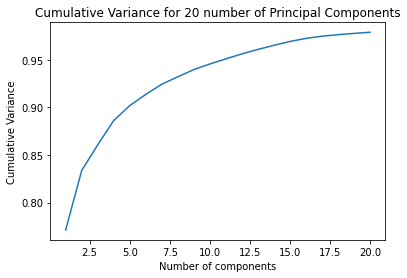

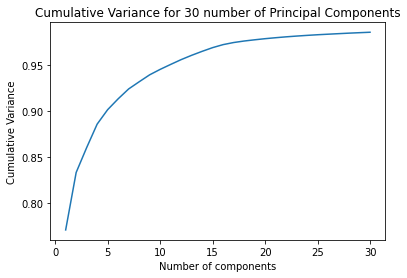

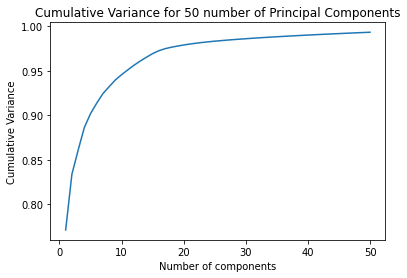

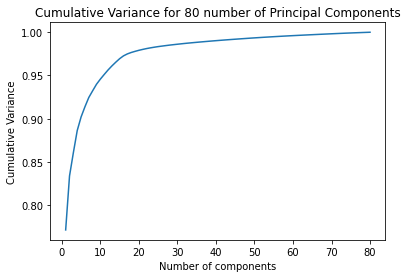

In [ ]:
no_of_components = [20,30,50,80]

for i in no_of_components: 
    pca = PCA(n_components=i)
    pca.fit(X_train)
    PCA_X = pca.transform(X_train)
    PCA_X_Test = pca.transform(X_test)
    plt.plot(np.arange(1, i+1), np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative Variance")
    plt.title("Cumulative Variance for {} number of Principal Components".format(i))
    plt.show()

#I am 80 features with 90% plus cumulative variance

In [ ]:
#I am choosing 80 as the number of principal components cause it can explain more than 90% of the variables
pca = PCA(n_components=80)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## Model creation 

In [ ]:
# Using 10 fold cross validation Ordinal logisting regression method
def model_training(X,y,model):
  print (f"--------------------------{model}--------------------------------")

  # splitting data to 10 folds
  kf = KFold(n_splits=10)

  # Variables to store the outputs
  accuracy_train = []
  accuracy_test = []
  max_accuracy = []
  var = []
  fold = 0
  auc_score_train = []
  auc_score_test = []
  f1score_train = []
  f1score_test = []
  mean_f1 = []
  std_f1 = []

  X = pd.DataFrame(X)
  y = pd.DataFrame(y)
  X = X.reset_index()
  y = y.reset_index().drop('index',axis=1)
    
  #splitting training and validation set based on index

  for train_index, test_index in kf.split(X):
        
    fold += 1
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = y.values[train_index], y.values[test_index]

    # Assigning variables to store prediciton values
    pred_training= np.zeros((len(X_train),14))
    pred_testing= np.zeros((len(X_test),14))
    Y_tr_new = Y_train.copy()
    Y_te_new = Y_test.copy()

    # for loop to go through 15 classes in target column
    for i in range(14):

      #Here, I am assigning the first target variable as 0 and the rest as 1. When loop runs twice, the second target variable
      #is also made 0. As the loop runs, the number of 0s increses
      Y_tr_new[Y_train <=i] = 0
      Y_tr_new[Y_train >i] = 1
      model.fit(X_train,Y_tr_new)

      #storing probabilities for the validation set
      predictions_0_val = model.predict_proba(X_test)[:,0]
      predictions_1_val = model.predict_proba(X_test)[:,1]
      pred_testing[:,i] = predictions_0_val

      #storing probabilities for the train set
      predictions_0_train = model.predict_proba(X_train)[:,0]
      predictions_1_train = model.predict_proba(X_train)[:,1]
      pred_training[:,i] = predictions_0_train
    
    #Here, I am calculating the difference in probabilities to calculate actual probability for validation and test data
    pred_diff = np.diff(pred_testing)
    pred_diff2 = np.append(pred_testing[:,0].reshape(-1,1),pred_diff,axis=1)# appending the first column of prob_0 becasue it will give the direct probability
    pred_values_test = np.append(pred_diff2, predictions_1_val.reshape(-1,1),axis=1)# appending last column of prob_1 because it will give the direct prob of last class.
    
    # Similarly for training data
    pred_diff_train = np.diff(pred_training)
    pred_diff2_train = np.append(pred_training[:,0].reshape(-1,1), pred_diff_train,axis=1)
    pred_values_train = np.append(pred_diff2_train, predictions_1_train.reshape(-1,1),axis=1)

    #Here, I am predicting the actual classes
    y_pred_train = np.argmax(pred_values_train, axis=1)
    y_pred_test = np.argmax(pred_values_test, axis=1)

    # F1 score to understand the effect of false positives and negetives
    f1score = f1_score(Y_test, y_pred_test, average = 'weighted')
    f1score_test.append(f1score)
    f1score_train.append(f1_score(Y_train, y_pred_train, average = 'weighted'))

    
    # Accuracy score
    accuracy_tr = accuracy_score(Y_train,y_pred_train)
    accuracy_te = accuracy_score(Y_test,y_pred_test)
    accuracy_train.append(accuracy_tr)
    accuracy_test.append(accuracy_te)
    variance = np.var(accuracy_test)
    var.append(variance)

    print(f"Fold: {fold} Training Accuracy: {round (accuracy_tr,4)} Validation set Accuracy: {round(accuracy_te,4)} f1_Score: {round(f1score,4)}") 

  # mean accuracy values of training and validation set  
  mean_outcome_train = np.mean(accuracy_train)
  mean_outcome_val = np.mean(accuracy_test)

  # standard deviation value and maximun accuracy value
  std_outcome = np.std(accuracy_test)
  max_accuracy.append(max(accuracy_test))
  mean_f1.append(np.mean(f1score_test))
  std_f1.append(np.std(f1score_test))   
    
  #bias and variance
  bias_sq = np.power((1 - np.array(mean_f1)), 2)
  var = np.power(np.array(std_f1), 2)

  print("Mean score: {0}".format(mean_outcome_val)) 
  print("Standard Deviation: {0}".format(std_outcome))
  print("Maximum accuracy value: ",max(accuracy_test))
  print("bias based on F1 score: ", bias_sq)
  print("Variance based on F1 score: ", var)
  

In [ ]:
#lfbgs and l2
model_training(X_train,y_train,LogisticRegression())

--------------------------LogisticRegression()--------------------------------
Fold: 1 Training Accuracy: 0.438 Validation set Accuracy: 0.384 f1_Score: 0.299
Fold: 2 Training Accuracy: 0.4388 Validation set Accuracy: 0.4536 f1_Score: 0.3246
Fold: 3 Training Accuracy: 0.4386 Validation set Accuracy: 0.4332 f1_Score: 0.3003
Fold: 4 Training Accuracy: 0.4355 Validation set Accuracy: 0.4708 f1_Score: 0.3475
Fold: 5 Training Accuracy: 0.4447 Validation set Accuracy: 0.4383 f1_Score: 0.2954
Fold: 6 Training Accuracy: 0.4366 Validation set Accuracy: 0.4522 f1_Score: 0.333
Fold: 7 Training Accuracy: 0.4404 Validation set Accuracy: 0.4568 f1_Score: 0.3263
Fold: 8 Training Accuracy: 0.4475 Validation set Accuracy: 0.4234 f1_Score: 0.2909
Fold: 9 Training Accuracy: 0.4443 Validation set Accuracy: 0.4095 f1_Score: 0.2871
Fold: 10 Training Accuracy: 0.4444 Validation set Accuracy: 0.429 f1_Score: 0.3247
Mean score: 0.43507234243406145
Standard Deviation: 0.024143900132941452
Maximum accuracy value

In [ ]:
#liblinear and l2
model_training(X_train,y_train,LogisticRegression(penalty = 'l2', solver ='liblinear'))

--------------------------LogisticRegression(solver='liblinear')--------------------------------
Fold: 1 Training Accuracy: 0.4632 Validation set Accuracy: 0.4416 f1_Score: 0.3019
Fold: 2 Training Accuracy: 0.4594 Validation set Accuracy: 0.4657 f1_Score: 0.337
Fold: 3 Training Accuracy: 0.4638 Validation set Accuracy: 0.4592 f1_Score: 0.3234
Fold: 4 Training Accuracy: 0.4608 Validation set Accuracy: 0.4791 f1_Score: 0.3535
Fold: 5 Training Accuracy: 0.464 Validation set Accuracy: 0.4457 f1_Score: 0.3116
Fold: 6 Training Accuracy: 0.4642 Validation set Accuracy: 0.467 f1_Score: 0.3358
Fold: 7 Training Accuracy: 0.4621 Validation set Accuracy: 0.4652 f1_Score: 0.3376
Fold: 8 Training Accuracy: 0.4623 Validation set Accuracy: 0.4271 f1_Score: 0.2934
Fold: 9 Training Accuracy: 0.468 Validation set Accuracy: 0.428 f1_Score: 0.3033
Fold: 10 Training Accuracy: 0.4629 Validation set Accuracy: 0.4531 f1_Score: 0.3283
Mean score: 0.45316932039972224
Standard Deviation: 0.016441915384140107
Maxi

In [ ]:
#saga and l2
model_training(X_train,y_train,LogisticRegression(penalty = 'l2', solver ='saga'))

--------------------------LogisticRegression(solver='saga')--------------------------------
Fold: 1 Training Accuracy: 0.4536 Validation set Accuracy: 0.4174 f1_Score: 0.2861
Fold: 2 Training Accuracy: 0.4479 Validation set Accuracy: 0.4647 f1_Score: 0.2949
Fold: 3 Training Accuracy: 0.4511 Validation set Accuracy: 0.4416 f1_Score: 0.2705
Fold: 4 Training Accuracy: 0.4462 Validation set Accuracy: 0.4884 f1_Score: 0.3205
Fold: 5 Training Accuracy: 0.451 Validation set Accuracy: 0.4457 f1_Score: 0.2748
Fold: 6 Training Accuracy: 0.4488 Validation set Accuracy: 0.4652 f1_Score: 0.2954
Fold: 7 Training Accuracy: 0.4489 Validation set Accuracy: 0.4643 f1_Score: 0.2944
Fold: 8 Training Accuracy: 0.4526 Validation set Accuracy: 0.4318 f1_Score: 0.2604
Fold: 9 Training Accuracy: 0.4532 Validation set Accuracy: 0.4262 f1_Score: 0.2547
Fold: 10 Training Accuracy: 0.45 Validation set Accuracy: 0.455 f1_Score: 0.2845
Mean score: 0.4500163651178375
Standard Deviation: 0.020494060415122257
Maximum a

It is seen that model 2 with liblinear solver performs best and also has the lowest variance among all the three models. Overall, all the model underfit the given data cause the bias is very high and the training and validation accuracies are low

## GRID Search, Hyper parameter tuning


I am choosing regularization strength and solver as the hyperparameter and tuning the model

In [ ]:
values_of_c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for i in values_of_c:
    model_training(X_train,y_train,LogisticRegression(penalty = 'l2', solver ='lbfgs', C = i))    

--------------------------LogisticRegression(C=1e-05)--------------------------------
Fold: 1 Training Accuracy: 0.4536 Validation set Accuracy: 0.4499 f1_Score: 0.2796
Fold: 2 Training Accuracy: 0.452 Validation set Accuracy: 0.4647 f1_Score: 0.2949
Fold: 3 Training Accuracy: 0.4546 Validation set Accuracy: 0.4416 f1_Score: 0.2705
Fold: 4 Training Accuracy: 0.4494 Validation set Accuracy: 0.4884 f1_Score: 0.3205
Fold: 5 Training Accuracy: 0.4541 Validation set Accuracy: 0.4457 f1_Score: 0.2748
Fold: 6 Training Accuracy: 0.4519 Validation set Accuracy: 0.4652 f1_Score: 0.2954
Fold: 7 Training Accuracy: 0.452 Validation set Accuracy: 0.4643 f1_Score: 0.2944
Fold: 8 Training Accuracy: 0.4557 Validation set Accuracy: 0.4318 f1_Score: 0.2604
Fold: 9 Training Accuracy: 0.4563 Validation set Accuracy: 0.4262 f1_Score: 0.2547
Fold: 10 Training Accuracy: 0.4531 Validation set Accuracy: 0.455 f1_Score: 0.2845
Mean score: 0.45326311836459066
Standard Deviation: 0.01741672776693111
Maximum accura

In [ ]:
#I am choosing c = 0.001 as c=0.00001, 0.0001 and 0.001 give the best results
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in range(len(solvers)):
    model_training(X_train,y_train, LogisticRegression(penalty = 'l2', solver = solvers[i], C = 0.001, max_iter =100))

--------------------------LogisticRegression(C=0.001, solver='newton-cg')--------------------------------
Fold: 1 Training Accuracy: 0.4553 Validation set Accuracy: 0.4499 f1_Score: 0.293
Fold: 2 Training Accuracy: 0.4548 Validation set Accuracy: 0.462 f1_Score: 0.2998
Fold: 3 Training Accuracy: 0.4567 Validation set Accuracy: 0.4434 f1_Score: 0.2786
Fold: 4 Training Accuracy: 0.4513 Validation set Accuracy: 0.4903 f1_Score: 0.3316
Fold: 5 Training Accuracy: 0.4562 Validation set Accuracy: 0.4475 f1_Score: 0.285
Fold: 6 Training Accuracy: 0.4546 Validation set Accuracy: 0.4661 f1_Score: 0.3079
Fold: 7 Training Accuracy: 0.4547 Validation set Accuracy: 0.4652 f1_Score: 0.3083
Fold: 8 Training Accuracy: 0.4581 Validation set Accuracy: 0.4318 f1_Score: 0.2716
Fold: 9 Training Accuracy: 0.4587 Validation set Accuracy: 0.4253 f1_Score: 0.2638
Fold: 10 Training Accuracy: 0.4558 Validation set Accuracy: 0.4522 f1_Score: 0.2968
Mean score: 0.4533560550074677
Standard Deviation: 0.0177202016141

Among all the different models that I tried, with l2 penalty, solver = 'newton cg' and c = 0.001 performs the best with a mean accuracy of 0.4353. Therefore, I am taking that model and plotting feature importance curve

In [ ]:
#choosing best model and drawing feature importance

def model_training_wo_cv(X,y,model):
  accuracy_train = []
  max_accuracy = []
  var = []
  f1score_train = []
  mean_f1 = []
  std_f1 = []

  X = pd.DataFrame(X)
  y = pd.DataFrame(y)
  X = X.reset_index()
  y = y.reset_index().drop('index',axis=1)
  Y_tr_new = y.copy()
  pred_store_train= np.zeros((len(X),14))

  # for loop to go through 15 classes in target column
  for i in range(14):
      # assigning first target variable alone as 0 and rest 1 as loop continues the number of 0's increases.
      Y_tr_new[y <=i] = 0
      Y_tr_new[y >i] = 1
      model.fit(X,Y_tr_new)

      # Training set - probability values storing
      predictions_0_train = model.predict_proba(X)[:,0]
      predictions_1_train = model.predict_proba(X)[:,1]
      pred_store_train[:,i] = predictions_0_train
        
  #Calculating actual probabilities
  pred_diff_tr = np.diff(pred_store_train)
  pred_diff2_tr = np.append(pred_store_train[:,0].reshape(-1,1),pred_diff_tr,axis=1)
  pred_store_train = np.append(pred_diff2_tr,predictions_1_train.reshape(-1,1),axis=1)

  #predicting the actual classes
  y_pred_train = np.argmax(pred_store_train, axis=1)
  
  return y_pred_train


In [ ]:
y_pred_train = model_training_wo_cv(X_train,y_train, LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 0.001, max_iter =100))

Now, I am merging the predicted targets with the train df prior to one hot encoding and plotting the correlation of features with the predicted targets

In [ ]:
X_train_corr = X_train_df.copy()
X_train_corr = X_train_corr.merge(pd.DataFrame(y_pred_train, columns = ['predicted labels']), how = 'inner', on = X_train_df.index)

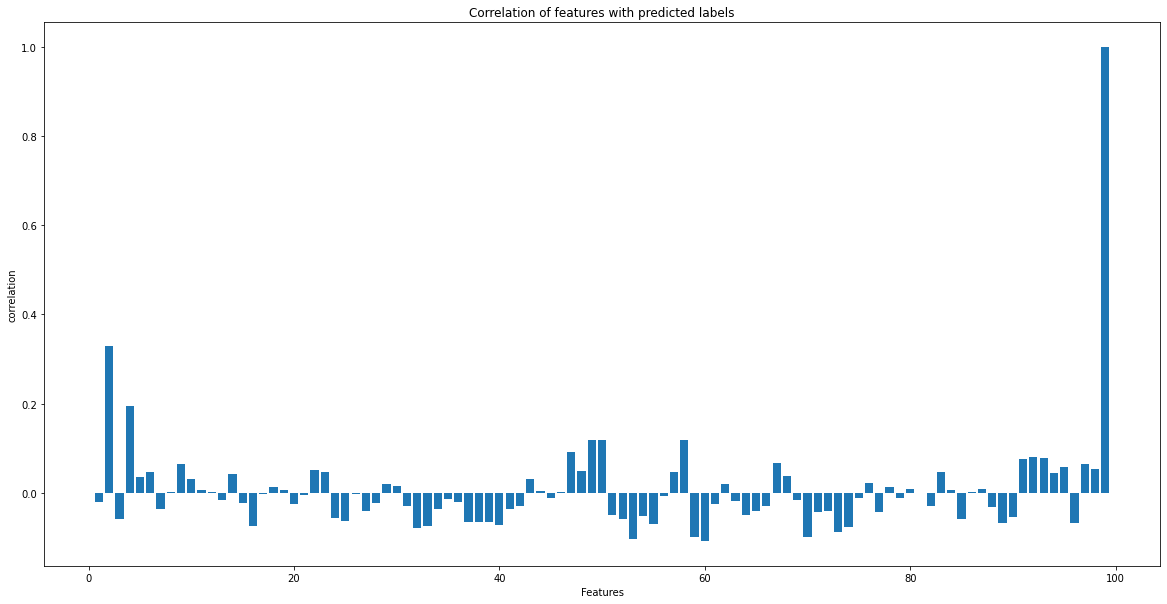

In [ ]:
x_new = X_train_corr.corrwith(X_train_corr["predicted labels"])
plt.figure(figsize = (20,10))
plt.bar(np.arange(1,len(x_new) + 1), x_new)
plt.xlabel("Features")
plt.ylabel("correlation")
plt.title("Correlation of features with predicted labels")
plt.show()

In [ ]:
#printing the correlation to see which features contribute to the model's predictions
x_new = x_new.sort_values(ascending=False)
print(x_.to_string())

predicted labels    1.000000
Q1                  0.351896
Q3                  0.248822
Q23                 0.141801
Q26                 0.139074
Q22                 0.124310
Q27_B_Part_1        0.088028
Q27_B_Part_3        0.084356
Q29_B_Part_3        0.080090
Q20                 0.079431
Q37_B_Part_1        0.069306
Q7_Part_2           0.066430
Q32_B_Part_5        0.063735
Q38_B_Part_11       0.062783
Q32_A_Part_2        0.061243
Q41                 0.060445
Q31_B_Part_9        0.060303
Q24_Part_7          0.056135
Q5                  0.052779
Q21                 0.050406
Q7_Part_3           0.044798
Q8                  0.044094
Q4                  0.040486
Q10_Part_2          0.039364
Q10_Part_1          0.038408
Q17_Part_9          0.034160
Q32_A_Part_3        0.027655
Q42_Part_1          0.020037
Q9_Part_5           0.013706
Q27_A_Part_11       0.013129
Q7_Part_1           0.008153
Q40_Part_7          0.007818
Q40_Part_6          0.007218
Q7_Part_5           0.006725
Q39_Part_6    

## TESTING PHASE

In [ ]:
def testing_model(X_train,y_train,X_test,y_test, model):
  print (f"--------------------------{model}--------------------------------")

  # Variables to store the outputs
  f1score_train = []

  # Assigning variables to store prediciton values
  pred_store_train= np.zeros((len(X_train),14))
  pred_store_test= np.zeros((len(X_test),14))
  Y_tr_new = y_train.copy()
  Y_te_new = y_test.copy()

  # for loop to go through 15 classes in target column
  for i in range(14):
        
    Y_tr_new[y_train <=i] = 0
    Y_tr_new[y_train >i] = 1
    model.fit(X_train,Y_tr_new)

    #storing probability values of the test set
    predictions_0 = model.predict_proba(X_test)[:,0]
    predictions_1 = model.predict_proba(X_test)[:,1]
    pred_store_test[:,i] = predictions_0

    #storing probability values for train set
    predictions_0_tr = model.predict_proba(X_train)[:,0]
    predictions_1_tr = model.predict_proba(X_train)[:,1]
    pred_store_train[:,i] = predictions_0_tr
  
  # Difference in probability values
  pred_diff = np.diff(pred_store_test)
  pred_diff2 = np.append(pred_store_test[:,0].reshape(-1,1),pred_diff,axis=1)# appending the first column of prob_0 becasue it will give the direct probability
  pred_values_te = np.append(pred_diff2,predictions_1.reshape(-1,1),axis=1)# appending last column of prob_1 because it will give the direct prob of last class.
  
  # Similarly for training data
  pred_diff_tr = np.diff(pred_store_train)
  pred_diff2_tr = np.append(pred_store_train[:,0].reshape(-1,1),pred_diff_tr,axis=1)
  pred_values_tr = np.append(pred_diff2_tr,predictions_1_tr.reshape(-1,1),axis=1)

  #predicting actual classes
  y_pred_train = np.argmax(pred_values_tr, axis=1)
  y_pred_test = np.argmax(pred_values_te, axis=1)

  # F1 score to understand the effect of false positives and negetives
  f1score = f1_score(y_test, y_pred_test, average = 'weighted')

  #Accuracy score is taken as the major metric becasue importance of the true positives and true negetives are more important in this case.
  accuracy_tr = accuracy_score(y_train,y_pred_train)
  accuracy_te = accuracy_score(y_test,y_pred_test)

  print(f"Training Accuracy: {round (accuracy_tr,2)} Test set Accuracy: {round(accuracy_te, 2)} f1_Score: {round(f1score,2)}") 
  print("\n\t\t\tClassification report\n", classification_report(y_test, y_pred_test))

  return y_pred_test


In [ ]:
#testing the test dataset on the best model chosen in the previous section
predicted_labels_test = testing_model(X_train,y_train, X_test, y_test, LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 0.001, max_iter =100))

--------------------------LogisticRegression(C=0.001, solver='newton-cg')--------------------------------
Training Accuracy: 0.46 Test set Accuracy: 0.46 f1_Score: 0.3

			Classification report
               precision    recall  f1-score   support

           0       0.47      0.99      0.64      2117
           1       0.00      0.00      0.00       450
           2       0.05      0.00      0.01       238
           3       0.00      0.00      0.00        98
           4       0.14      0.07      0.09       116
           5       0.00      0.00      0.00       309
           6       0.50      0.01      0.03        68
           7       0.00      0.00      0.00       233
           8       0.00      0.00      0.00       212
           9       0.07      0.01      0.02       209
          10       0.00      0.00      0.00       150
          11       0.29      0.01      0.03       151
          12       0.08      0.01      0.02       116
          13       0.05      0.01      0.02     

The model performs similar to the train set, there is no overfitting. But, there is underfitting as both the train and test set has low accuracies and F1 scores. Furthermore, the model rightly predicts and is able to recall only the first class very well.

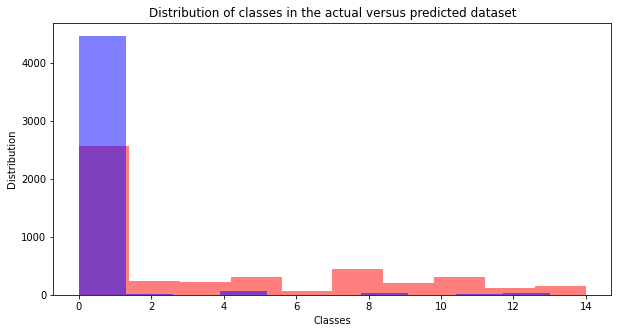

In [ ]:
#plotting the distribution for actual and predicted targets

plt.figure(figsize = (10,5))
plt.hist(y_test.T, alpha = 0.5, color ='red')
plt.hist(predicted_labels_test, alpha = 0.5, color = 'blue')
plt.xlabel("Classes")
plt.ylabel("Distribution")
#plt.legend()
plt.title("Distribution of classes in the actual versus predicted dataset")
plt.show()

From the distribution, it is evident that we most of the classes predicted by the model are 0s. The rest of the classes are hardly chosen. The given data set may be non-linearly separable and hence logistic regression may not be the best model to go for. Maybe nueral networks woule be able to predict the classes better. 